In [27]:
import pandas as pd
import sqlite3

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
connect_sql = sqlite3.connect('/content/drive/MyDrive/ex07_42/checking-logs.sqlite')

In [30]:
df = pd.read_sql('select t.timestamp from checker t where t.uid like "user%"', connect_sql, parse_dates=['timestamp'])
df

,timestamp
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370
...,...
3202,2020-05-21 20:19:06.872761
3203,2020-05-21 20:22:41.785725
3204,2020-05-21 20:22:41.877806
3205,2020-05-21 20:37:00.129678


In [31]:
df['date'] = df['timestamp'].dt.floor('d')
df['hour'] = df['timestamp'].dt.hour
df = df.drop('timestamp', axis=1)

In [32]:
working_day = df.loc[df['date'].dt.dayofweek < 5]
weekend = df.loc[df['date'].dt.dayofweek >= 5]

In [33]:
df_1 = working_day.groupby('hour').date.value_counts().unstack(0)

In [34]:
df_2 = weekend.groupby('hour').date.value_counts().unstack(0)

In [35]:
index = pd.RangeIndex(stop=24)

In [36]:
df_1 = df_1.mean()
df_1 = df_1.reindex(index=index, fill_value=0)
df_1 = df_1.rename('working_day')

In [37]:
df_2 = df_2.mean()
df_2 = df_2.reindex(index=index, fill_value=0)
df_2 = df_2.rename('weekend')

In [38]:
df = pd.concat([df_1, df_2], axis=1)
df = df.rename_axis('hour')

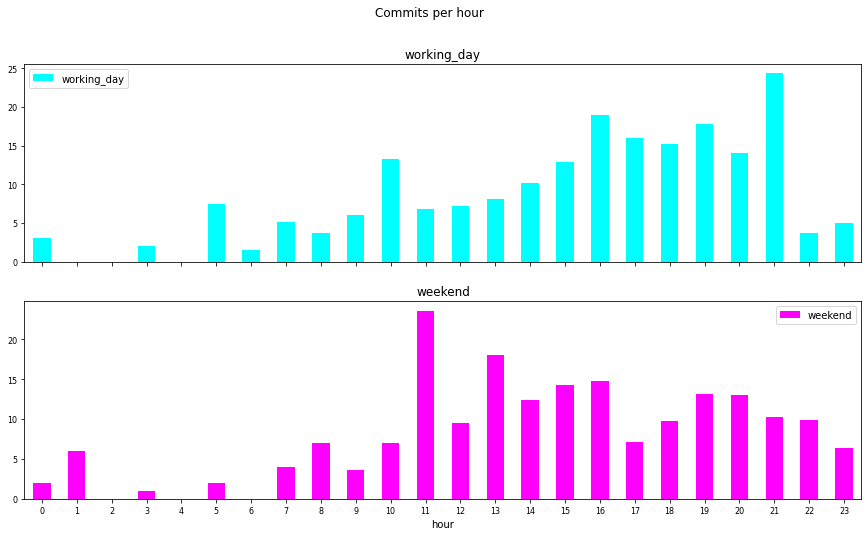

In [39]:
ax = df.plot.bar(figsize=(15, 8), title='Commits per hour', rot=0, fontsize=8,
                 colormap='cool', sharex=True, subplots=True)

In [40]:
df['working_day'].idxmax()

21

In [41]:
df['weekend'].idxmax()

11